Data Preparation

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans

# Load the dataset
file_path = '/content/Dataset.csv'  # Adjust this path if needed
df = pd.read_csv(file_path)

# Display dataset overview
print("Dataset head:")
print(df.head())

print("Descriptive Statistics:")
print(df.describe())

print("Data Info:")
print(df.info())

# Remove non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Feature Engineering: Create interaction and polynomial features
df['cooling_quench_interaction'] = df['coolingRate'] * df['quenchTime']
df['cooling_forge_interaction'] = df['coolingRate'] * df['forgeTime']
df['Nickel_Iron_interaction'] = df['Nickel%'] * df['Iron%']

# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(df[['coolingRate', 'quenchTime', 'forgeTime', 'Nickel%', 'Iron%']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['coolingRate', 'quenchTime', 'forgeTime', 'Nickel%', 'Iron%']))
df = pd.concat([df, poly_df], axis=1)

# Create labels: Binning lifespan and thresholding
bins = [0, 1000, 1500, np.inf]
labels = ['Short', 'Medium', 'Long']
df['Lifespan_bins'] = pd.cut(df['Lifespan'], bins=bins, labels=labels)

df['1500_labels'] = (df['Lifespan'] > 1500).astype(int)

# Optional: Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster_labels'] = kmeans.fit_predict(df[['Lifespan']])


Dataset head:
   Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   1469.17   Nozzle      equiGrain           13        3.84       6.47   
1   1793.64    Block    singleGrain           19        2.62       3.48   
2    700.60    Blade      equiGrain           28        0.76       1.34   
3   1082.10   Nozzle       colGrain            9        2.01       2.19   
4   1838.83    Blade       colGrain           16        4.13       3.87   

   HeatTreatTime  Nickel%  Iron%  Cobalt%  Chromium%  smallDefects  \
0          46.87    65.73  16.52    16.82       0.93            10   
1          44.70    54.22  35.38     6.14       4.26            19   
2           9.54    51.83  35.95     8.81       3.41            35   
3          20.29    57.03  23.33    16.86       2.78             0   
4          16.13    59.62  27.37    11.45       1.56            10   

   largeDefects  sliverDefects seedLocation    castType  
0             0              0       Bottom         Die 

Plotting the Distribution of Thresholded Lifespan

<ipython-input-3-78a4d5237cc3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='1500_labels', data=df, palette='viridis')


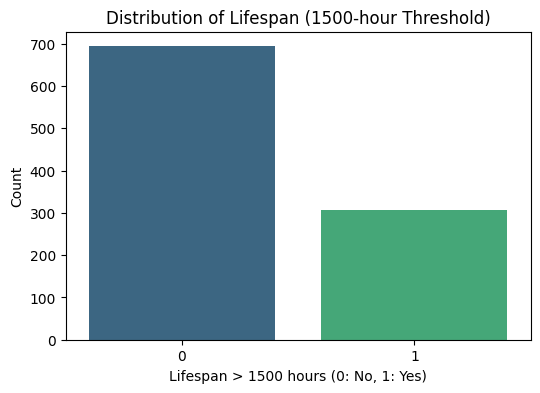

<ipython-input-3-78a4d5237cc3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Lifespan_bins', data=df, palette='muted')


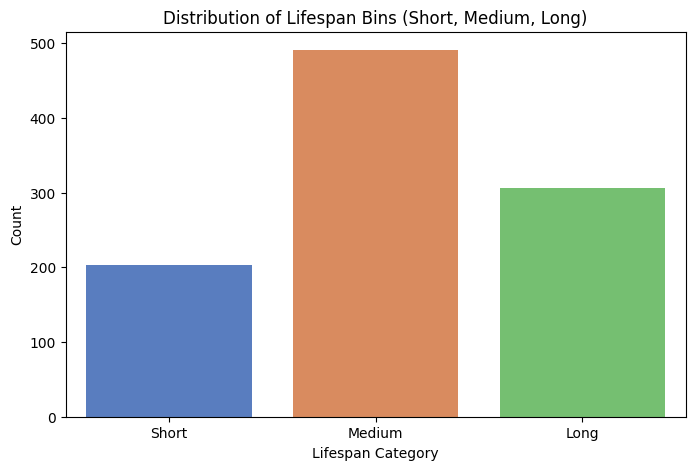

Threshold Distribution (1500-hour):
1500_labels
0    694
1    306
Name: count, dtype: int64

Lifespan Bins Distribution:
Lifespan_bins
Medium    491
Long      306
Short     203
Name: count, dtype: int64


In [ ]:
# Plotting the distribution of the 1500-hour threshold (binary classification)
plt.figure(figsize=(6, 4))
sns.countplot(x='1500_labels', data=df, palette='viridis')
plt.title('Distribution of Lifespan (1500-hour Threshold)')
plt.xlabel('Lifespan > 1500 hours (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

# Plotting the distribution of Lifespan bins (Short, Medium, Long)
plt.figure(figsize=(8, 5))
sns.countplot(x='Lifespan_bins', data=df, palette='muted')
plt.title('Distribution of Lifespan Bins (Short, Medium, Long)')
plt.xlabel('Lifespan Category')
plt.ylabel('Count')
plt.show()

# Count values in each category
threshold_distribution = df['1500_labels'].value_counts()
bins_distribution = df['Lifespan_bins'].value_counts()

print("Threshold Distribution (1500-hour):")
print(threshold_distribution)

print("\nLifespan Bins Distribution:")
print(bins_distribution)


Visualization

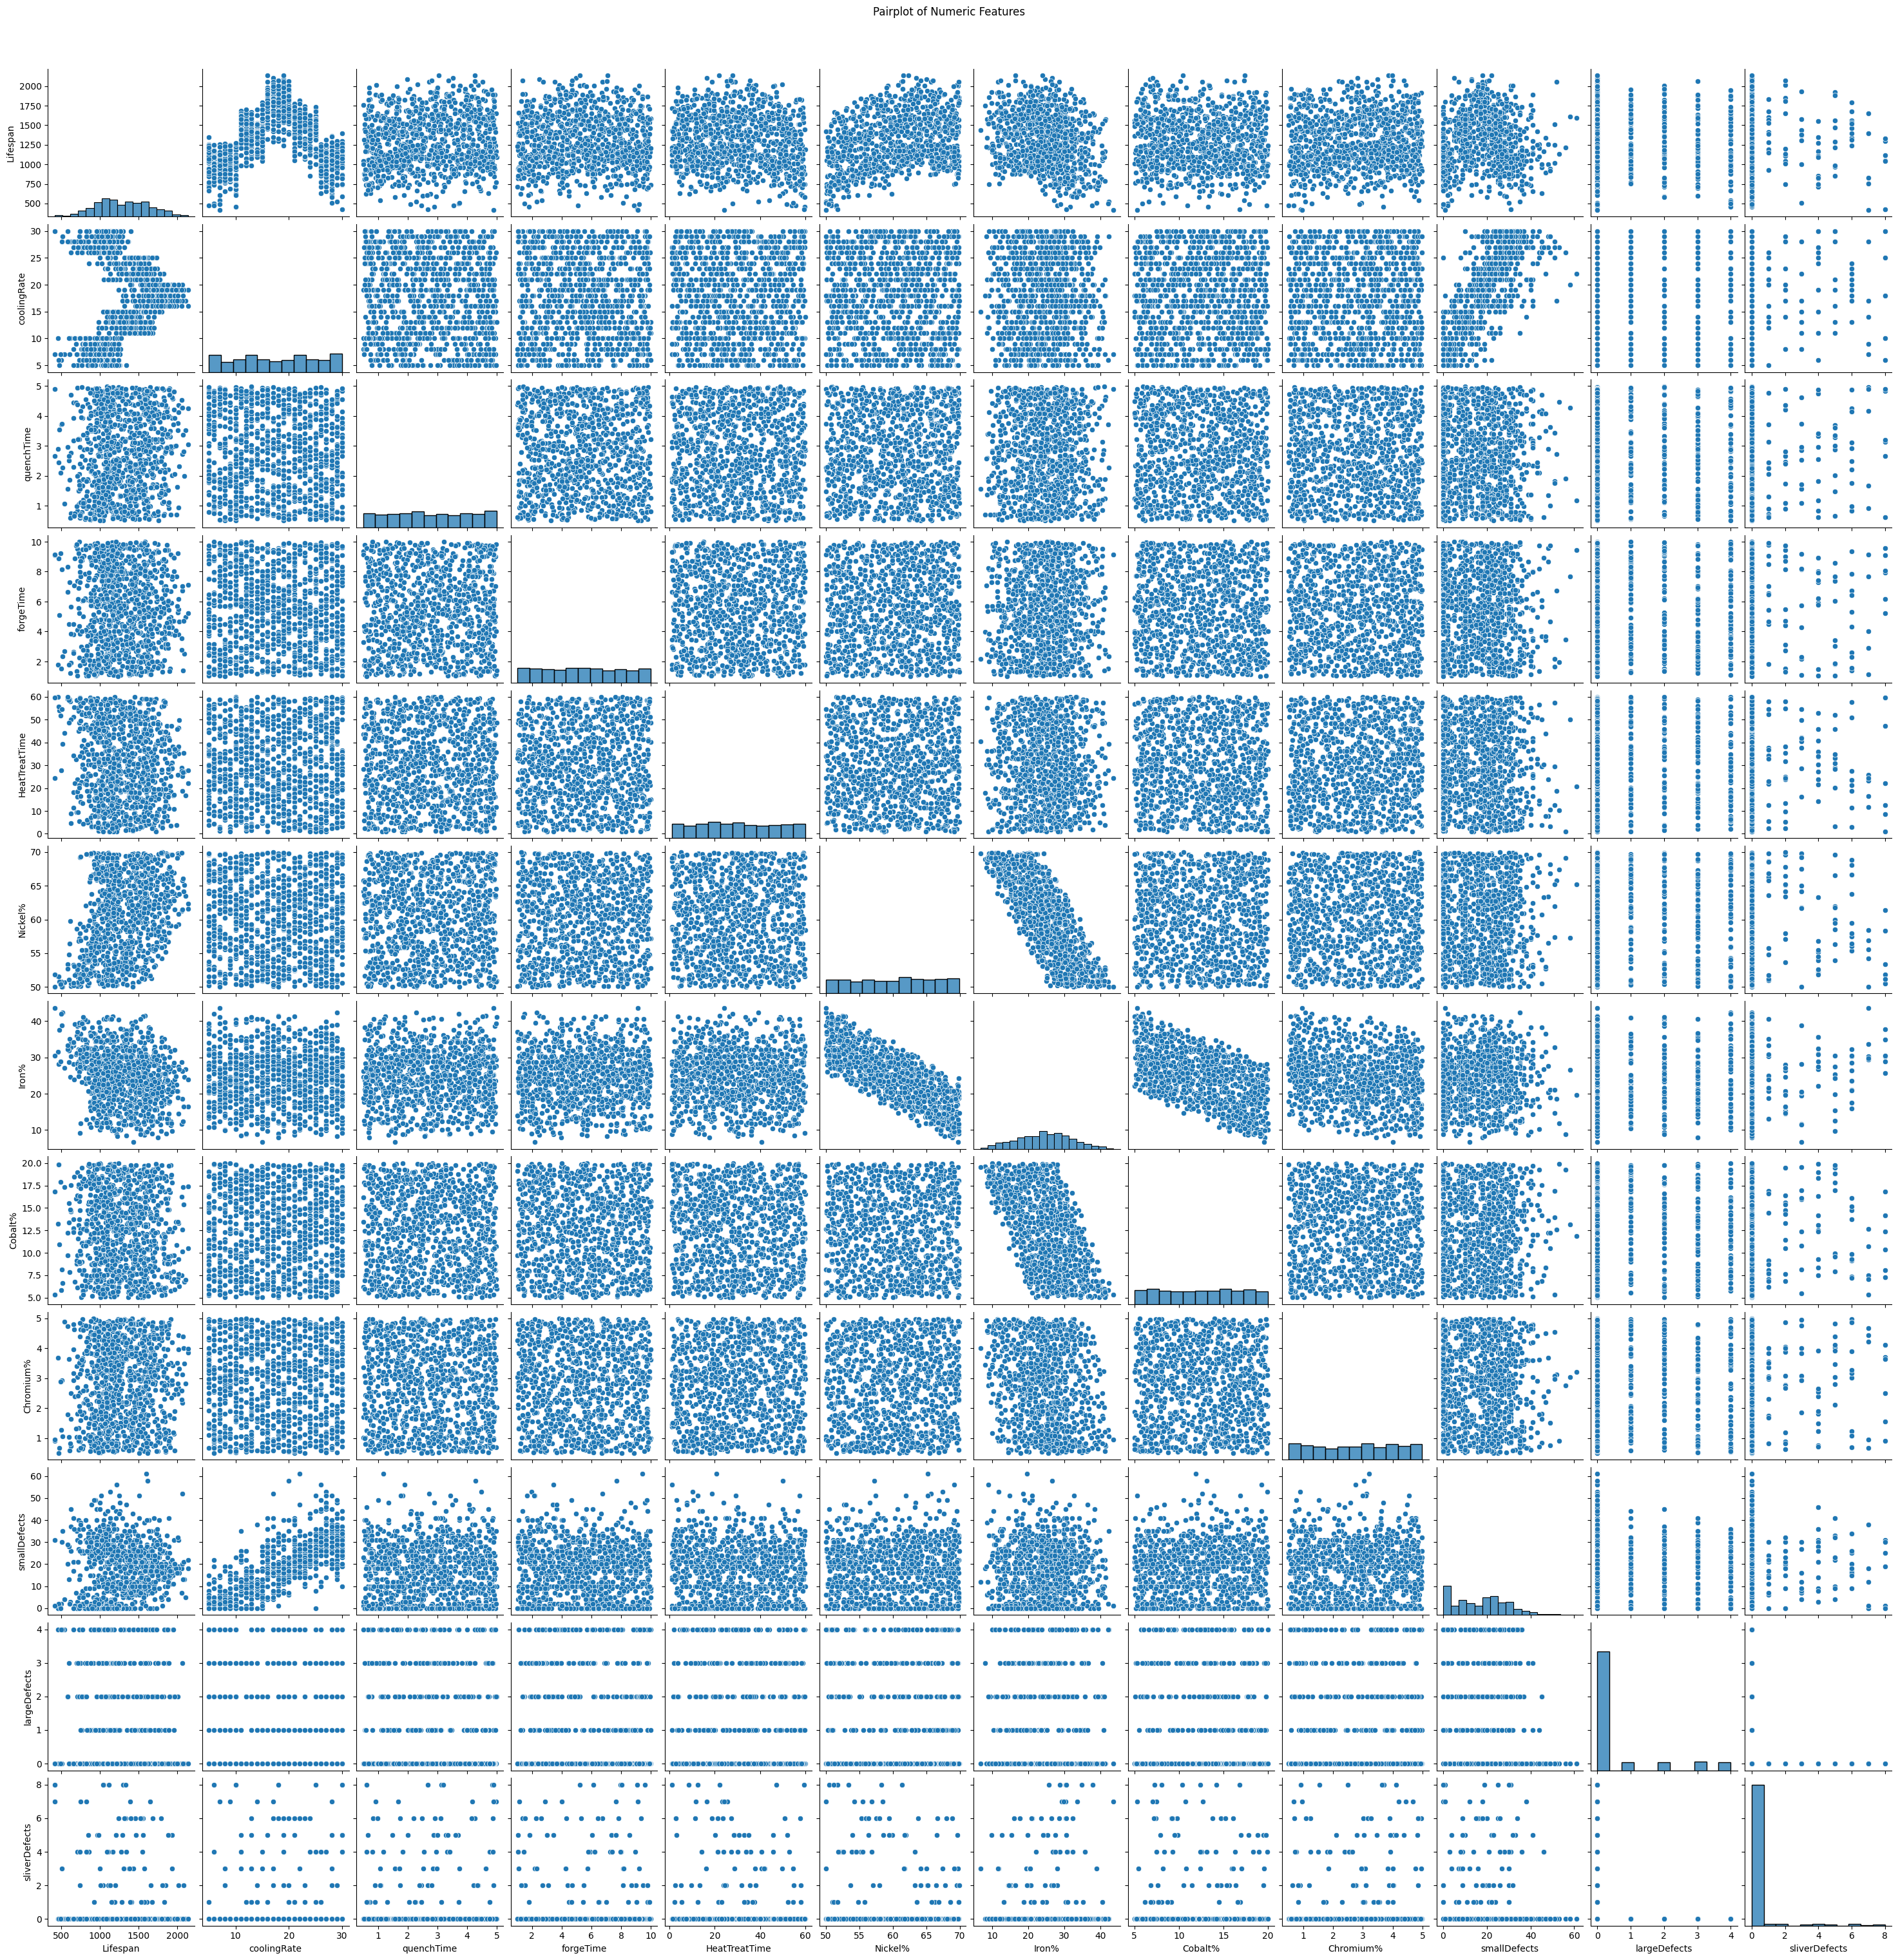

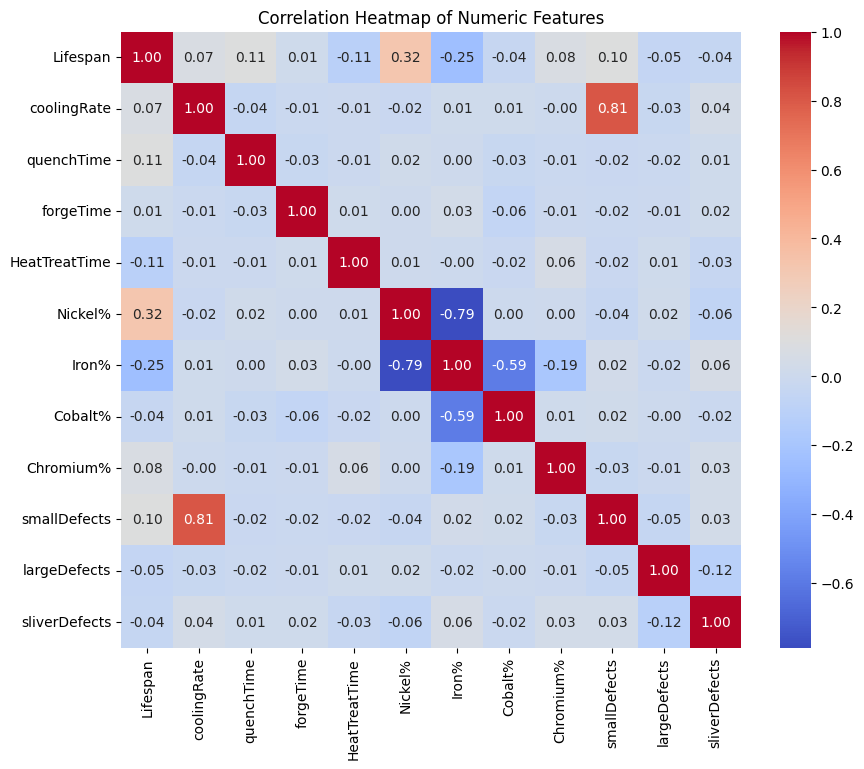

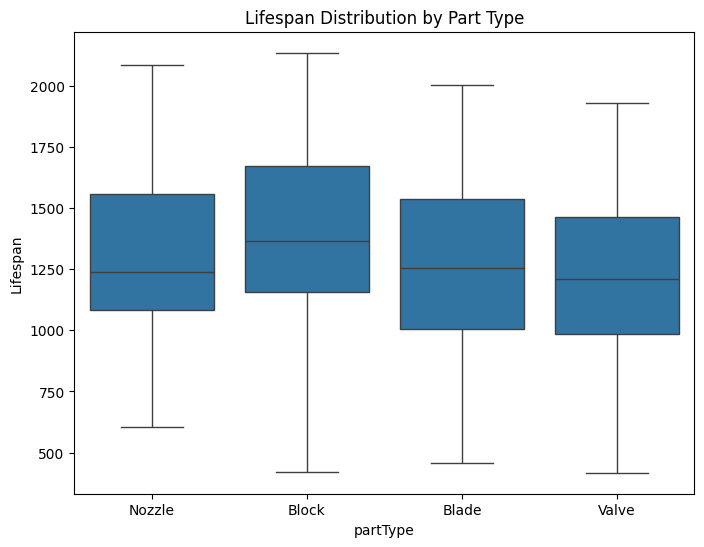

<Figure size 1200x800 with 0 Axes>

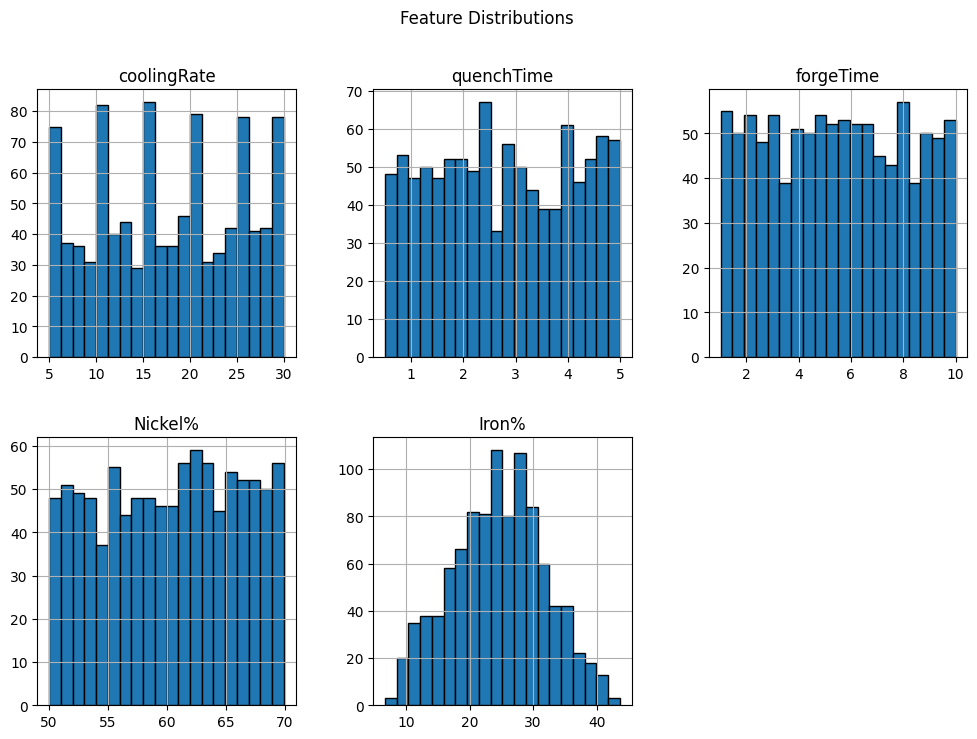

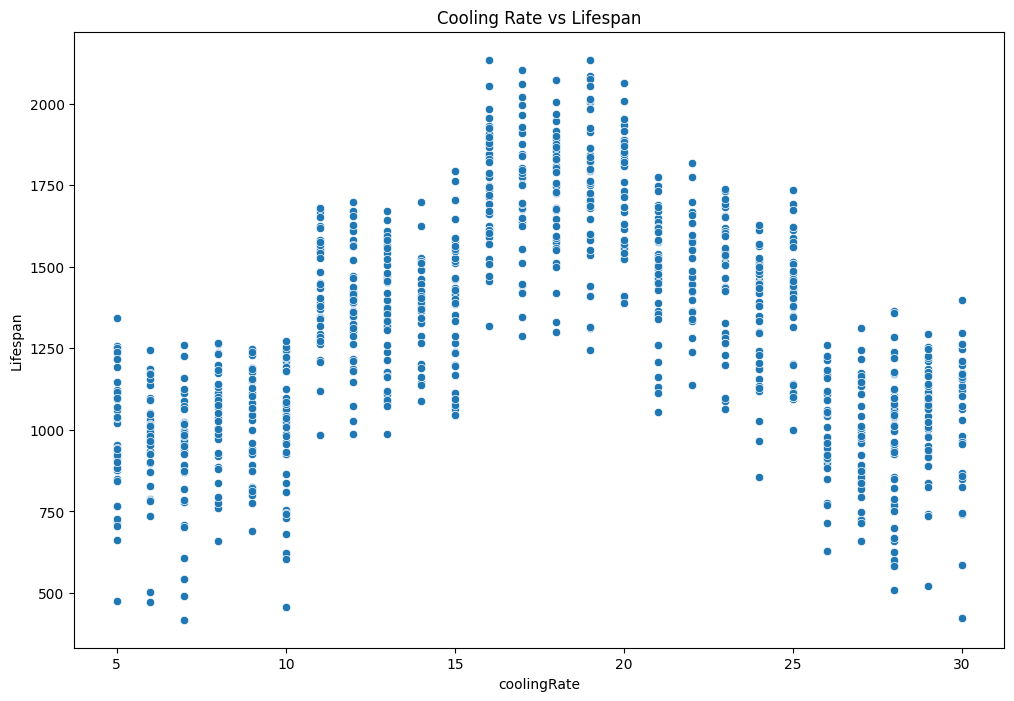

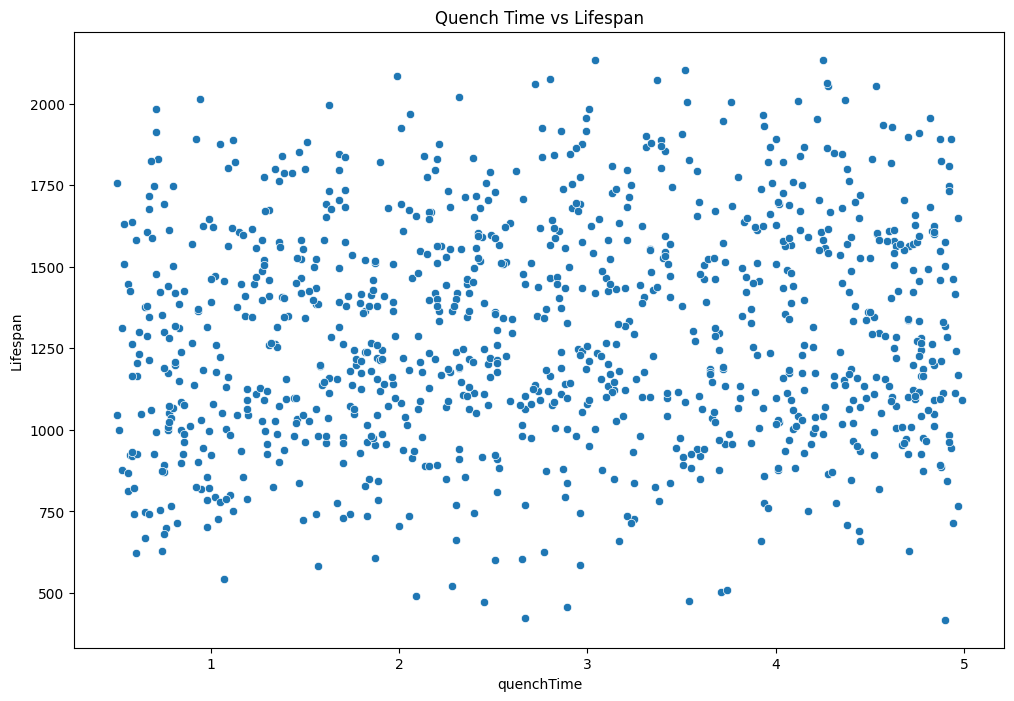

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Filter numeric columns for analysis
numeric_df = df.select_dtypes(include=[np.number])

# Pairplot for relationships among numeric features
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Box Plot for Lifespan across different part types
if 'partType' in df.columns and 'Lifespan' in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='partType', y='Lifespan', data=df)
    plt.title('Lifespan Distribution by Part Type')
    plt.show()
else:
    print("Columns 'partType' or 'Lifespan' not found for boxplot.")

# Histograms for feature distributions
plt.figure(figsize=(12, 8))
numeric_df[['coolingRate', 'quenchTime', 'forgeTime', 'Nickel%', 'Iron%']].hist(
    bins=20, edgecolor='black', layout=(2, 3), figsize=(12, 8)
)
plt.suptitle('Feature Distributions')
plt.show()

# Scatter plots for feature relationships with Lifespan
if 'coolingRate' in df.columns and 'Lifespan' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='coolingRate', y='Lifespan', data=df.dropna(subset=['coolingRate', 'Lifespan']))
    plt.title('Cooling Rate vs Lifespan')
    plt.show()
else:
    print("Columns 'coolingRate' or 'Lifespan' not found for scatterplot.")

if 'quenchTime' in df.columns and 'Lifespan' in df.columns:
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='quenchTime', y='Lifespan', data=df.dropna(subset=['quenchTime', 'Lifespan']))
    plt.title('Quench Time vs Lifespan')
    plt.show()
else:
    print("Columns 'quenchTime' or 'Lifespan' not found for scatterplot.")


Regression Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Select features and target
features = ['coolingRate', 'quenchTime', 'forgeTime', 'Nickel%', 'Iron%']
target = 'Lifespan'

# Ensure features and target are available
if not all(col in df.columns for col in features + [target]):
    raise KeyError("Some features or target column are missing in the dataset.")

# Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[features])
poly_feature_names = poly.get_feature_names_out(features)

# Create a DataFrame for polynomial features
poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
poly_df.index = df.index  # Align indices with the original DataFrame

# Concatenate original and polynomial features
X_reg = pd.concat([df[features], poly_df], axis=1)
y_reg = df[target]

# Train/Test split
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

# Models: Linear Regression and Random Forest
model_lr = LinearRegression()
model_rf = RandomForestRegressor(random_state=42)

# Hyperparameter tuning for Random Forest
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train_reg_scaled, y_train_reg)
best_rf = grid_search_rf.best_estimator_

# Train the models
model_lr.fit(X_train_reg_scaled, y_train_reg)
best_rf.fit(X_train_reg_scaled, y_train_reg)

# Predictions and evaluation
y_pred_lr = model_lr.predict(X_test_reg_scaled)
y_pred_rf = best_rf.predict(X_test_reg_scaled)

mae_lr = mean_absolute_error(y_test_reg, y_pred_lr)
mae_rf = mean_absolute_error(y_test_reg, y_pred_rf)
r2_lr = r2_score(y_test_reg, y_pred_lr)
r2_rf = r2_score(y_test_reg, y_pred_rf)

print(f"Linear Regression - MAE: {mae_lr}, R²: {r2_lr}")
print(f"Random Forest Regression - MAE: {mae_rf}, R²: {r2_rf}")


Linear Regression - MAE: 154.73117876218137, R²: 0.6373292248907962
Random Forest Regression - MAE: 112.56943502526632, R²: 0.8196290055017472


Classification Analysis

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# Add a classification label for thresholding (example threshold at 1500 for '1500_labels')
threshold = 1500
df['1500_labels'] = (df['Lifespan'] >= threshold).astype(int)

# Select features for classification
features = ['coolingRate', 'quenchTime', 'forgeTime', 'Nickel%', 'Iron%']

# Generate Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[features])
poly_feature_names = poly.get_feature_names_out(features)

# Create a DataFrame for polynomial features
poly_df = pd.DataFrame(X_poly, columns=poly_feature_names)
poly_df.index = df.index  # Align indices with the original DataFrame

# Concatenate original and polynomial features
X_class = pd.concat([df[features], poly_df], axis=1)
y_class = df['1500_labels']

# Train/Test split
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Models: Logistic Regression and Random Forest Classifier
model_lr_class = LogisticRegression(random_state=42)
model_rf_class = RandomForestClassifier(random_state=42)

# Hyperparameter tuning for Random Forest Classifier
param_grid_rf_class = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search_rf_class = GridSearchCV(estimator=model_rf_class, param_grid=param_grid_rf_class, cv=5)
grid_search_rf_class.fit(X_train_class_scaled, y_train_class)
best_rf_class = grid_search_rf_class.best_estimator_

# Train the models
model_lr_class.fit(X_train_class_scaled, y_train_class)
best_rf_class.fit(X_train_class_scaled, y_train_class)

# Predictions and evaluation
y_pred_lr_class = model_lr_class.predict(X_test_class_scaled)
y_pred_rf_class = best_rf_class.predict(X_test_class_scaled)

accuracy_lr = accuracy_score(y_test_class, y_pred_lr_class)
accuracy_rf = accuracy_score(y_test_class, y_pred_rf_class)

print(f"Logistic Regression - Accuracy: {accuracy_lr}")
print(f"Random Forest Classifier - Accuracy: {accuracy_rf}")

print("Classification Report for Logistic Regression:")
print(classification_report(y_test_class, y_pred_lr_class))

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test_class, y_pred_rf_class))


Logistic Regression - Accuracy: 0.885
Random Forest Classifier - Accuracy: 0.89
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       145
           1       0.80      0.78      0.79        55

    accuracy                           0.89       200
   macro avg       0.86      0.85      0.85       200
weighted avg       0.88      0.89      0.88       200

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       145
           1       0.78      0.84      0.81        55

    accuracy                           0.89       200
   macro avg       0.86      0.87      0.87       200
weighted avg       0.89      0.89      0.89       200



Results Visualization

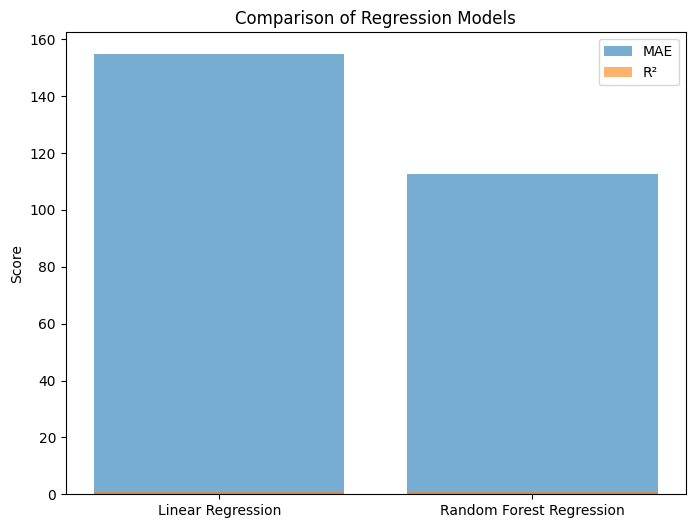

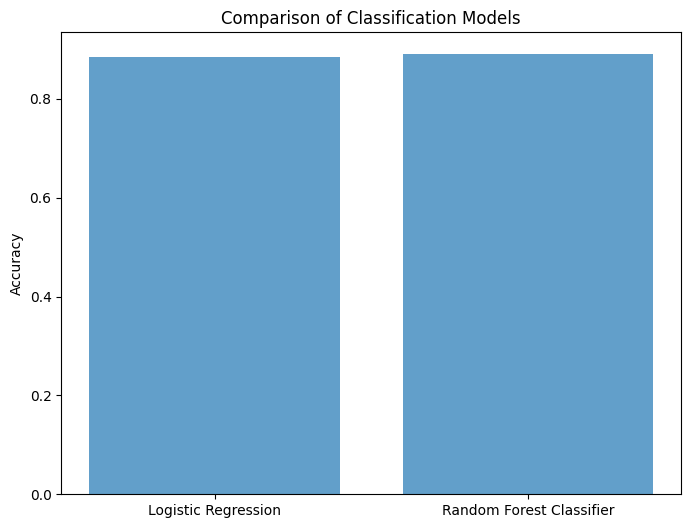

In [ ]:
# Regression Models Comparison
models_regression = ['Linear Regression', 'Random Forest Regression']
mae_values = [mae_lr, mae_rf]
r2_values = [r2_lr, r2_rf]

plt.figure(figsize=(8, 6))
plt.bar(models_regression, mae_values, alpha=0.6, label='MAE')
plt.bar(models_regression, r2_values, alpha=0.6, label='R²')
plt.title('Comparison of Regression Models')
plt.ylabel('Score')
plt.legend()
plt.show()

# Classification Models Comparison
models_classification = ['Logistic Regression', 'Random Forest Classifier']
accuracy_values = [accuracy_lr, accuracy_rf]

plt.figure(figsize=(8, 6))
plt.bar(models_classification, accuracy_values, alpha=0.7)
plt.title('Comparison of Classification Models')
plt.ylabel('Accuracy')
plt.show()
